In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [3]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

NameError: name 'plt' is not defined

In [3]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','yielda','darea','areayieldrataio','rainfallaverage','fgprice'], axis=1)
y = df.drop(['dctrice','percentageofarea','darea','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [6]:
y

,yielda
0,0.832626
1,1.065706
2,1.383386
3,2.640510
4,0.540153
...,...
39739,0.643724
39740,1.708459
39741,0.729707
39742,0.298725


In [7]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [8]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [9]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [10]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
X_train

,windspeed,rainfall24,rainfall6,area,yield,distance,dctrice
2998,27.070846,0.032979,0.125000,345.0,4.51,100.51080,6.476275e+06
16149,6.019287,1.173936,1.173936,8039.0,4.70,252.81010,5.553857e+07
1106,31.306583,2.052083,3.116667,48.0,3.92,76.43904,5.681104e+05
1368,8.704666,3.120833,7.781250,1275.0,5.12,387.10950,2.836358e+07
8530,13.493266,0.778083,1.170333,165.0,2.27,317.99430,2.522815e+05
...,...,...,...,...,...,...,...
14774,6.202194,1.720567,1.720567,2408.0,7.72,268.58180,4.837969e+07
35629,3.809631,1.876596,1.876596,4.0,2.86,341.90320,2.724130e+03
15169,5.281554,3.620213,3.620213,448.0,2.62,267.90360,8.963281e+04
2172,25.377307,1.111631,4.078889,7080.0,5.36,130.10760,1.882052e+08


In [12]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [13]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yielda  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   dctrice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [14]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [15]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [16]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [17]:
X_val

,windspeed,rainfall24,rainfall6,area,yield,distance,dctrice
31511,15.974263,0.007738,0.027381,164.0,4.11,150.223900,166383.41
31001,44.970222,2.393229,6.691667,105.0,4.55,3.731118,123889.89
38328,7.252452,3.350521,6.300000,2739.0,3.68,280.959300,1536174.95
8001,33.878516,0.094583,0.213333,2167.0,2.94,85.724430,2111223.37
31097,11.845751,0.000000,0.000000,662.0,5.19,197.586500,1594627.94
...,...,...,...,...,...,...,...
7596,36.262834,0.546875,1.597917,254.0,3.79,74.362240,269639.60
36565,3.864767,0.422128,0.422128,227.0,4.32,353.282200,1761368.40
11299,10.844943,0.000000,0.000000,2040.0,5.53,213.400400,22001926.78
6724,16.338128,0.056042,0.122500,988.0,3.25,190.806200,5883799.95


In [18]:
y_train

,yielda
2998,2.118667
16149,1.580965
1106,1.568412
1368,2.457433
8530,0.448730
...,...
14774,3.455325
35629,0.387208
15169,0.200873
2172,2.748545


In [19]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [20]:
# Null Remover

nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

print(np.where(pd.isnull(X_val)))

(array([], dtype=int64), array([], dtype=int64))


In [21]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [22]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import load, dump
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Load the models
svr_pipeline = load('SVR-DYIELD.joblib')
rf = load('RFR-DYIELD.joblib')


final_estimator = RandomForestRegressor(
    
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_leaf_nodes=100,
    random_state=42,
)

# Create a StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=[('svr', svr_pipeline), ('rf', rf)],
    final_estimator=final_estimator
)

stacking_regressor.fit(X_train, y_train)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('svr',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('svr',
                                                SVR(C=2, coef0=2, degree=2,
                                                    gamma='auto',
                                                    kernel='poly'))])),
                              ('rf',
                               Pipeline(steps=[('randomforestregressor',
                                                RandomForestRegressor(max_depth=20,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=2,
                                                                      random_state=42))]))],
                  final_estimator=RandomForestRegressor(max_depth=20,
                       

In [25]:

predictions = stacking_regressor.predict(X_test)

# Evaluate the model
r2 = stacking_regressor.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = stacking_regressor.predict(X_val)

# Evaluate the model


r2 = stacking_regressor.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.9707897816719154
Mean Absolute Error (Test): 0.10040179235028492

R-squared (Validation): 0.9660592226961838
Mean Absolute Error (Validation): 0.1027075278475642

Explained Variance (Test): 0.970792833987829
Explained Variance (Validation): 0.9660647390445809

Mean Absolute Error (Test, p.p.): 8.39265790954198%
Mean Absolute Error (Validation, p.p.): 8.474595040109858%


In [26]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yielda  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


In [27]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['0.48', '0.58', '0.39', '0.44', '0.91', '0.60', '0.27', '1.70', '1.92', '0.33', '2.16', '2.50', '1.95', '0.85', '1.26', '0.40', '0.49', '2.31', '0.45', '2.27', '1.54', '0.85', '0.44', '0.63', '0.65', '1.77', '1.30', '0.27', '0.27', '1.19', '1.89', '0.40', '2.02', '0.60', '0.92', '1.94', '2.23', '2.22', '1.77', '0.82', '2.27', '2.32', '0.40', '2.13', '1.20', '0.29', '1.95', '1.46', '0.66', '0.64', '1.32', '1.40', '1.17', '0.62', '2.13', '0.85', '0.73', '1.22', '0.70', '2.80', '0.27', '0.24', '0.60', '1.05', '1.19', '0.79', '0.53', '0.76', '1.74', '0.56', '0.40', '1.04', '0.33', '0.83', '0.70', '0.51', '2.14', '2.26', '0.45', '0.73', '1.17', '0.53', '2.26', '2.37', '0.56', '1.88', '0.65', '0.58', '1.13', '1.01', '0.33', '2.35', '0.36', '0.73', '0.77', '0.85', '1.80', '2.26', '2.15', '2.59', '2.31', '0.40', '0.44', '0.93', '2.01', '1.27', '1.47', '0.70', '1.54', '2.16', '0.55', '0.98', '1.13', '0.27', '0.53', '1.12', '2.36', '0.27', '1.67', '0.60', '0.66', '0.74', '0.87', '0.44', '2.33',

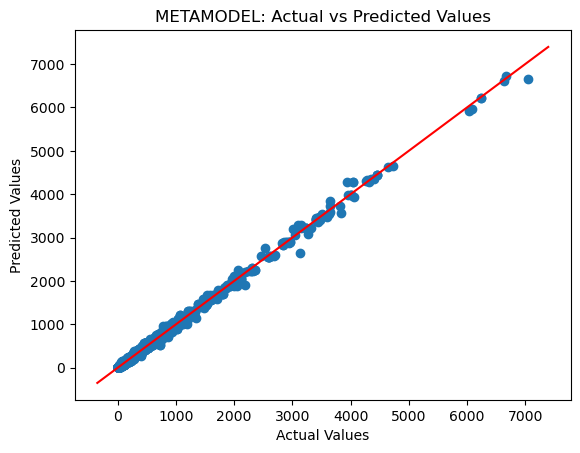

In [25]:
import matplotlib.pyplot as plt

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

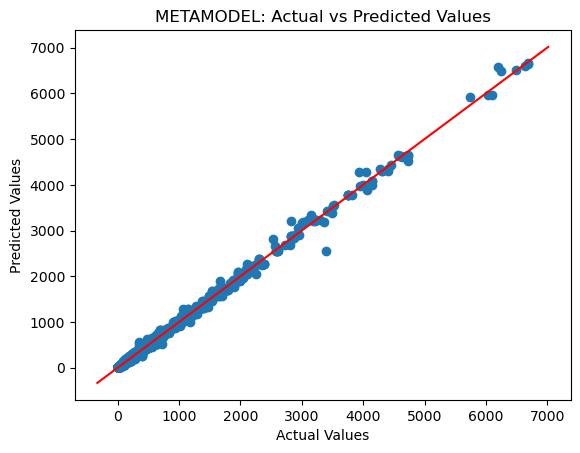

In [26]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = stacking_regressor.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [27]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

         Actual Predicted
0     30.235670     24.38
1    608.606722    567.36
2    136.180042    155.09
3    187.278489    184.14
4    105.450131     74.19
5    152.033502    155.60
6    238.698252    215.63
7      5.075225      7.83
8   1594.434973   1565.02
9     52.380358     64.52
10    35.425384     35.22
11    20.438753     23.75
12  1328.567244   1300.39
13   110.065888    111.39
14  1069.453424   1021.69
15   334.057817    392.36
16   260.436496    248.21
17   300.465465    260.17
18  1586.184727   1680.79
19   707.514481    642.05


In [28]:
from sklearn.pipeline import make_pipeline
from joblib import dump

pipeline = make_pipeline(stacking_regressor)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'STACKED-SVR_RF-DYIELD.joblib')

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['STACKED-SVR_RF-DYIELD.joblib']